# EDA on Zomato Bangalore Dataset

# Introduction

The basic idea of analyzing the Zomato dataset is to get a fair idea about the factors affecting the establishment of different types of restaurant at different places in Bengaluru, aggregate rating of each restaurant, Bengaluru being one such city has more than 12,000 restaurants with restaurants serving dishes from all over the world. With each day new restaurants opening the industry has’nt been saturated yet and the demand is increasing day by day. Inspite of increasing demand it however has become difficult for new restaurants to compete with established restaurants. Most of them serving the same food. Bengaluru being an IT capital of India. Most of the people here are dependent mainly on the restaurant food as they don’t have time to cook for themselves. With such an overwhelming demand of restaurants it has therefore become important to study the demography of a location.

## Finding insights

- What kind of a food is more popular in a locality.
- Which locality of that city serves that cuisines with maximum number of restaurants • The needs of people who are striving to get the best cuisine of the neighborhood • Is a particular neighborhood famous for its own kind of food.



# Importing the libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
plt.style.use('ggplot')
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=False)
from geopy.geocoders import Nominatim
from folium.plugins import HeatMap
import folium
from tqdm import tqdm

# 1.Preprocessing the data

### 1.1 Loading the dataset

In [2]:
data=pd.read_csv('../input/zomato.csv')

In [3]:
data.head(5)

url       ...       listed_in(city)
0  https://www.zomato.com/bangalore/jalsa-banasha...       ...          Banashankari
1  https://www.zomato.com/bangalore/spice-elephan...       ...          Banashankari
2  https://www.zomato.com/SanchurroBangalore?cont...       ...          Banashankari
3  https://www.zomato.com/bangalore/addhuri-udupi...       ...          Banashankari
4  https://www.zomato.com/bangalore/grand-village...       ...          Banashankari

[5 rows x 17 columns]

### 1.2 Renaming columns

In [4]:
data=data.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                         'listed_in(city)':'city'})

### 1.3 Data cleaning

In [8]:
data['online_order']=data['online_order'].apply(lambda x: '1' if str(x)=='Yes' else '0')
data['book_table']=data['book_table'].apply(lambda x: '1' if str(x)=='Yes' else '0')
data['rate']=data['rate'].apply(lambda x: str(x).split('/')[0])
data['cost']=data['cost'].apply(lambda x: str(x).replace(',',''))
data.dropna(subset=['rate','cost'])
data=data[data['rate']!='nan']
data=data[data['rate']!='NEW']
data=data[data['rate']!='-']
data=data[data['cost']!='nan']
data['rate']=data['rate'].astype(float)
data['votes']=data['votes'].astype(int)
data['cost']=data['cost'].astype(int)

In [9]:
data.head(5)

url      ...               city
0  https://www.zomato.com/bangalore/jalsa-banasha...      ...       Banashankari
1  https://www.zomato.com/bangalore/spice-elephan...      ...       Banashankari
2  https://www.zomato.com/SanchurroBangalore?cont...      ...       Banashankari
3  https://www.zomato.com/bangalore/addhuri-udupi...      ...       Banashankari
4  https://www.zomato.com/bangalore/grand-village...      ...       Banashankari

[5 rows x 17 columns]

### 1.4 Drop Duplicates

In [10]:
data.drop_duplicates(inplace=True,keep='first')

# 2.EDA

## Which are the top restaurant chains in Bangalore ?

Text(0, 0.5, 'Chains')

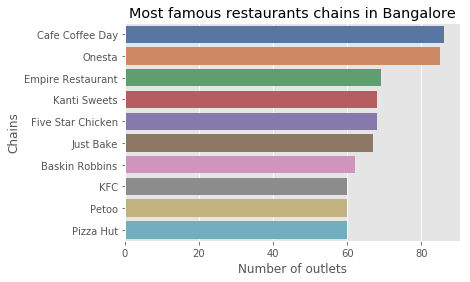

In [12]:
chains=data['name'].value_counts()[:10]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangalore")
plt.xlabel("Number of outlets")
plt.ylabel("Chains")

**We can see that Cafe Coffee Day has the most number of outlets.CCD is an Indian chain of Cafe's founded in 1996**

## What areas are paradise for the foodies ?

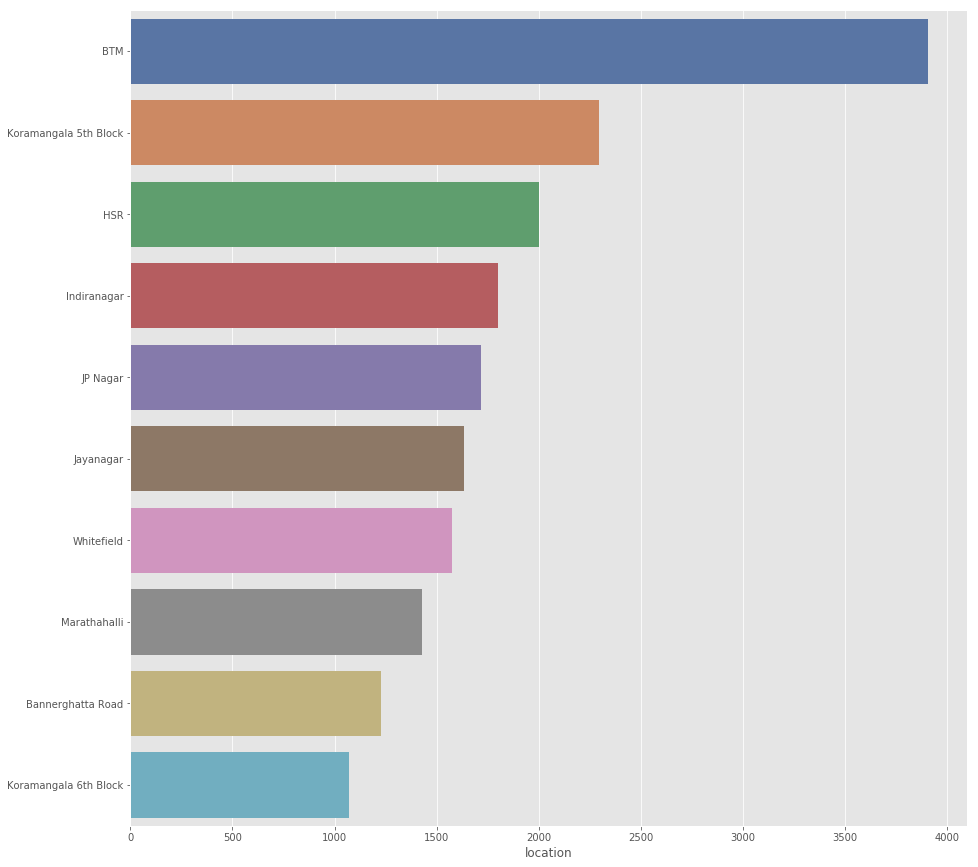

In [14]:
plt.figure(figsize=(15,15))
loc=data['location'].value_counts()[0:10]
sns.barplot(x=loc,y=loc.index,palette='deep')

**BTM has roughly 4000 restaurants !! Thats insane**

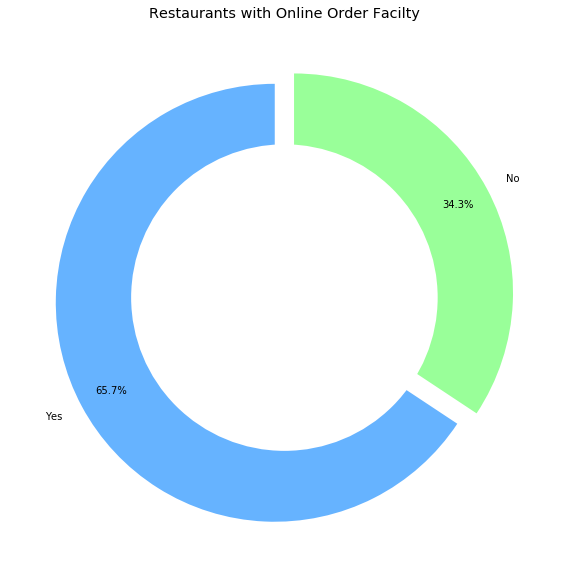

In [15]:
# https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

labels = ['Yes','No']
colors = ['#66b3ff','#99ff99']
explode = (0.05,0.05)

plt.figure(figsize=(8,8))
plt.pie(data['online_order'].value_counts(),colors = colors,autopct='%1.1f%%',labels=labels,startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.tight_layout() 
plt.title("Restaurants with Online Order Facilty")
plt.show()

**We can see that 61% restaurants have online order facilty 
which is very important in a fast paced life and also due to the food delivery apps**

Text(0.5, 1.0, 'Restaurants with Table Booking Facilty')

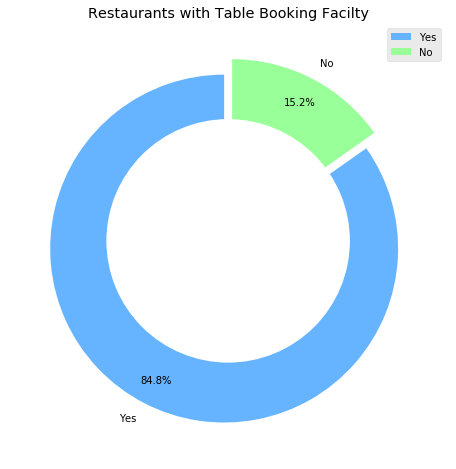

In [16]:
# https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f

labels = ['Yes','No']
colors = ['#66b3ff','#99ff99']
explode = (0.05,0.05)

plt.figure(figsize=(8,8))
plt.pie(data['book_table'].value_counts(),colors = colors,autopct='%1.1f%%',labels=labels,startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
plt.legend()
plt.title("Restaurants with Table Booking Facilty")


**We can see that 90% restaurants have a table booking facilty 
due to rush at peak hours.**

## Rating Distribution

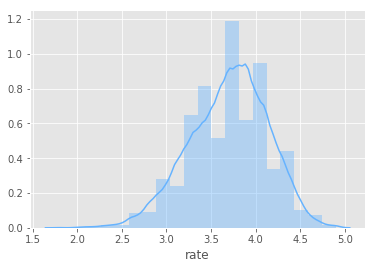

In [17]:
sns.distplot(data['rate'],bins=20,color='#66b3ff')

- Major restaurants have rating 3.2 to 4.2
- Very Less restaurants have ratings less than 2.5
- Very few restaurants have ratings greater than 4.5
- We can conclude that most of the restaurants are of average to above average type.

## Rating vs Online Order

Text(0, 0.5, 'Rating')

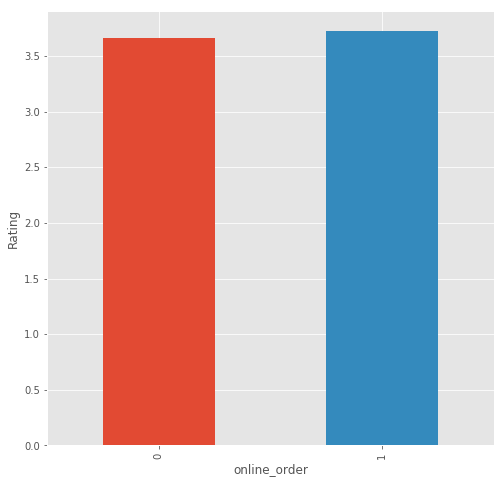

In [18]:
plt.figure(figsize=(8,8))
data.groupby('online_order')['rate'].mean().plot.bar()
plt.ylabel('Rating')

**Avaliblity of online ordering facility has a very less impact on rating.**

## Rating vs Table Booking

Text(0, 0.5, 'Rating')

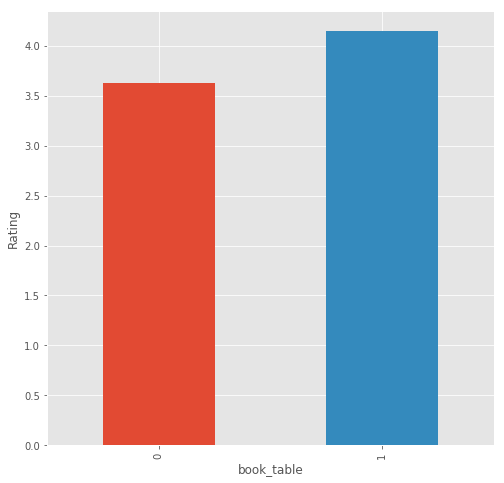

In [19]:
plt.figure(figsize=(8,8))
data.groupby('book_table')['rate'].mean().plot.bar()
plt.ylabel('Rating')

**Restaurants with table booking facility have higher ratings.**

## Distribution of cost for 2 people

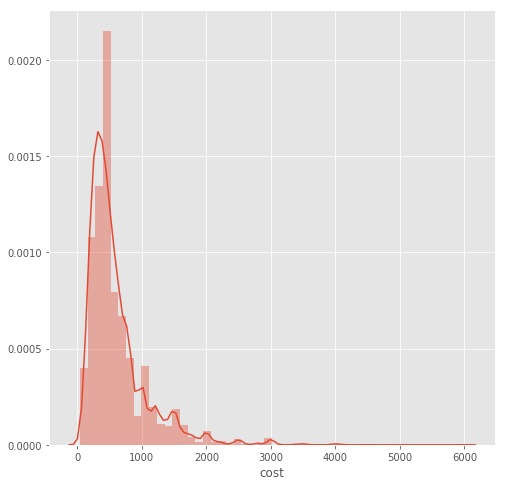

In [20]:
plt.figure(figsize=(8,8))
sns.distplot(data['cost'])

- **Almost 90% restaurants are 1000 for 2**
- **Number of very expensive restaurants is very less.**


## Most common restaurant types in the city.

Text(0, 0.5, 'Types')

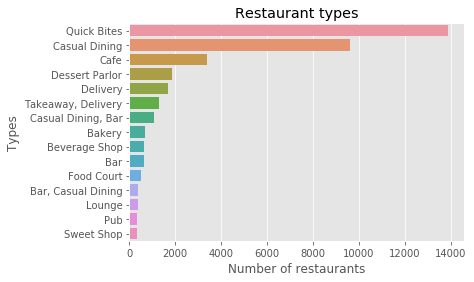

In [21]:
x=data['rest_type'].value_counts()[0:15]
sns.barplot(x,x.index)
plt.title("Restaurant types")
plt.xlabel("Number of restaurants")
plt.ylabel('Types')

** People prefer quick bities due to fast paced life and hectic schedules **

## Common Cusines in the restaurants

Text(0, 0.5, 'Types')

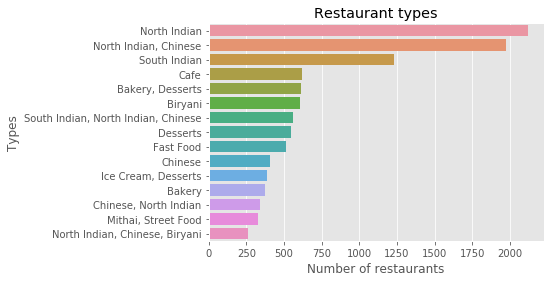

In [22]:
x=data['cuisines'].value_counts()[0:15]
sns.barplot(x,x.index)
plt.title("Restaurant types")
plt.xlabel("Number of restaurants")
plt.ylabel('Types')

** We see a South Indian city where people mostly prefer North Indian cuisine,this is because Banglore is a metro city.
   Number of restaurants who serve only North Indian is very high **

## Considering affordablity

Text(0, 0.5, 'Affordability')

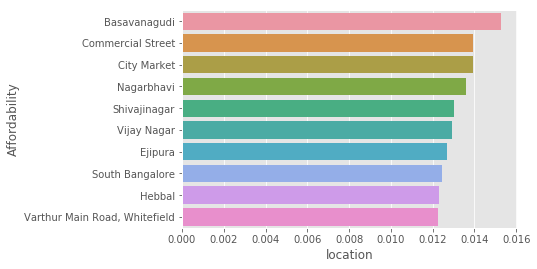

In [23]:
data['afford']=data['rate']/data['cost']
x=data.groupby('location')['afford'].mean().sort_values(ascending=False)[:10]
sns.barplot(x,x.index)
plt.xlabel('location')
plt.ylabel('Affordability')

** The restaurants which are very affordable are mostly in Basavanagudi **

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

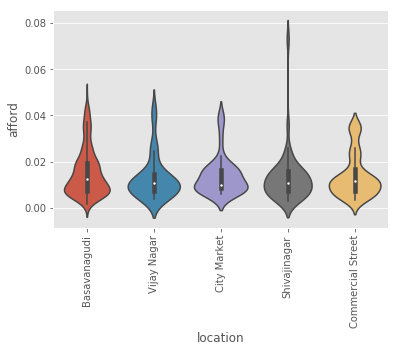

In [24]:
top_afford=data[data['location'].isin(['Basavanagudi','City Market','Commercial Street',
                                      'Shivajinagar','Vijay Nagar'])]
sns.violinplot(x='location',y='afford',data=top_afford)
plt.xticks(rotation=90)

** Shivaji Nagar has very high variance considering affordablity **

## Heatmap of restaurant count on each location

In [ ]:
#https://www.kaggle.com/shahules/zomato-complete-eda-and-lstm-model#Cost-vs-rating
#This idea was used from this kernel

In [30]:
locations=pd.DataFrame({"Name":data['location'].unique()})
locations['Name']=locations['Name'].apply(lambda x: "Bangalore " + str(x))
lat_lon=[]
geolocator=Nominatim(user_agent="app")
for location in locations['Name']:
    location = geolocator.geocode(location)
    if location is None:
        lat_lon.append(np.nan)
    else:    
        geo=(location.latitude,location.longitude)
        lat_lon.append(geo)


locations['geo_loc']=lat_lon

In [35]:
Rest_locations=pd.DataFrame(data['location'].value_counts().reset_index())
Rest_locations.columns=['Name','count']
Rest_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Rest_locations['count'].max()

3906

In [36]:
locations["Name"]=locations['Name'].apply(lambda x :  x.replace("Bangalore","")[1:])

In [37]:
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [38]:
lat,lon=zip(*np.array(Rest_locations['geo_loc']))
Rest_locations['lat']=lat
Rest_locations['lon']=lon
basemap=generateBaseMap()
HeatMap(Rest_locations[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)

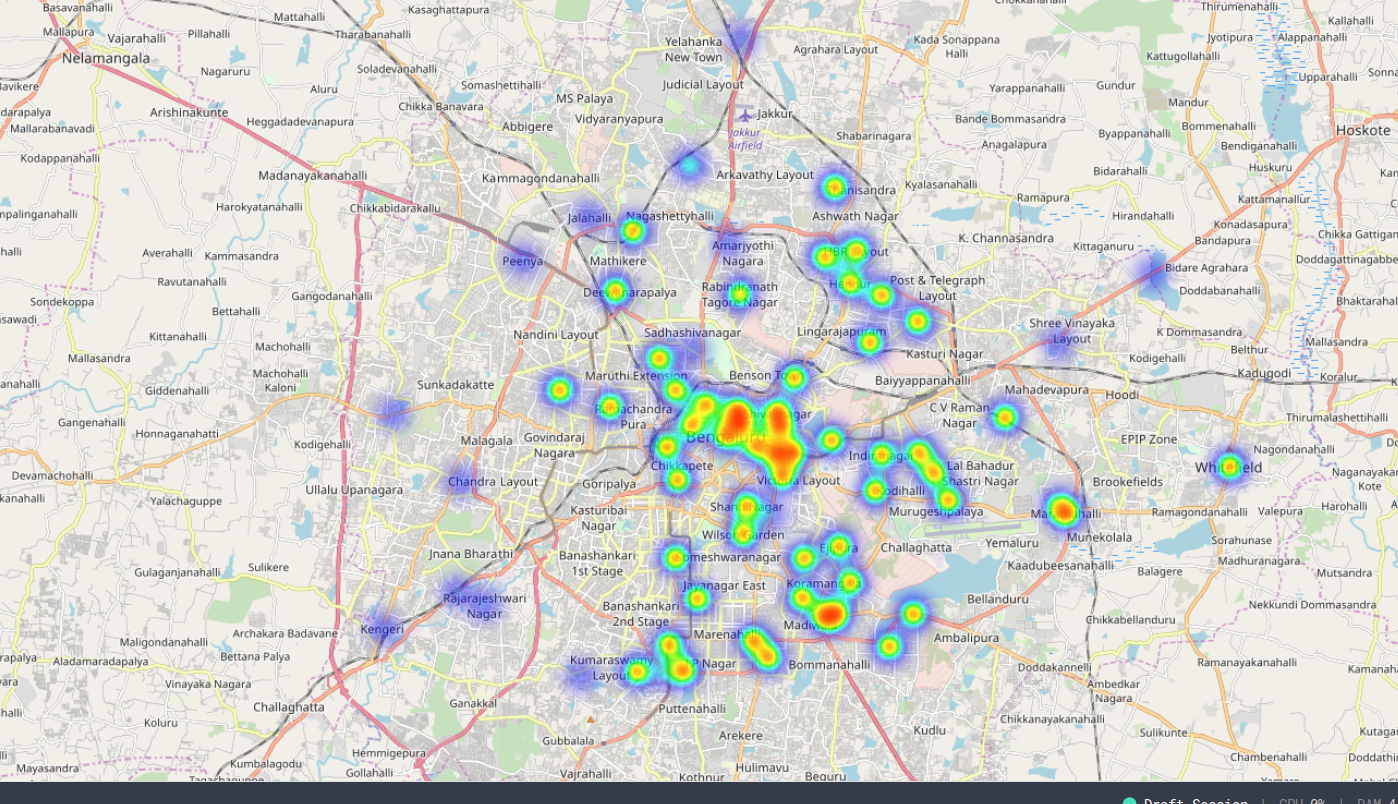

In [4]:
from IPython.display import Image
Image(filename='/home/imrekcah/heatmap.jpg.png')


   **1. It is clear that restaurants tend to concentrate in central bangalore area.**
   
   **2. The clutter of restaurants lowers are we move away from central.**
   
   **3. So,potential restaurant entrepreneurs can refer this and find out good locations for their venture.**

